# Aviation Risk Analysis
**Author:** BEATRICE NDANU KIILU 
**Date:** 28/APRIL/2025

## 1. Project Overview
- Goal: Help the company identify the *lowest risk* aircraft to purchase.
- This project analyzes aviation incident data to uncover trends, frequent aircraft types involved, and patterns over time.  
- The goal is to assist in business decision making.
- Data: Aviation accidents from the NTSB (1962–2023).

---

## 2. Business Understanding
- Problem: Company expanding into aviation but needs low-risk aircraft to minimize liability and maximize safety.
- Key Questions:
  - Which aircraft types have the fewest serious accidents?
  - Are there certain manufacturers with safer records?
  - How has accident frequency changed over time?




### 3. Data Understanding

In [28]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
aviation_data = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)

# Preview the data
aviation_data.head()
aviation_data.info()

# Check missing values
aviation_data.isnull().sum()

# Basic stats
aviation_data.describe()

# Unique values of important columns
aviation_data['Make'].value_counts()
aviation_data['Injury.Severity'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(199)        1
Fatal(229)        1
Fatal(111)        1
Fatal(123)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [29]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [30]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [31]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [32]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## 4. Data Cleaning & Preparation
- Drop or fill missing values if necessary.
- Create new columns:
  - `Accident Year` (extract from `Event Date`)
  - Clean up text fields (`Make`, `Model`, etc.)



In [33]:

# Example: extract year
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')
aviation_data['Year'] = aviation_data['Event.Date'].dt.year

# Example: clean Make
aviation_data['Make'] = aviation_data['Make'].str.strip().str.upper()


In [34]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


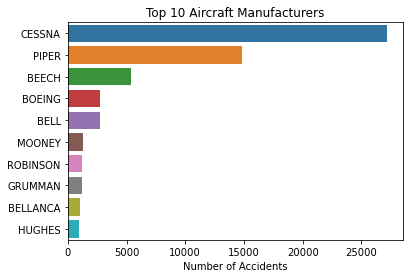

In [35]:
## 5. Exploratory Data Analysis (EDA)

### 5.1 Most Common Aircraft Manufacturers
top_makes = aviation_data['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Aircraft Manufacturers')
plt.xlabel('Number of Accidents')
plt.show()


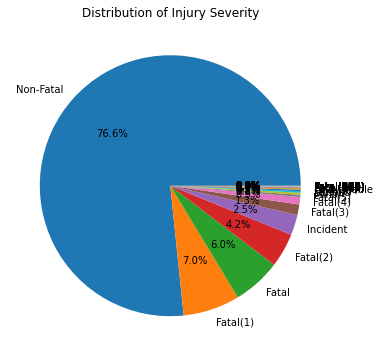

In [36]:
### 5.2 Severity of Accidents
injury_counts = aviation_data['Injury.Severity'].value_counts()
injury_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('Distribution of Injury Severity')
plt.ylabel('')
plt.show()


In [43]:
# Extract Year
aviation_data['Event_Year'] = aviation_data['Event.Date'].dt.year

In [45]:
# Extract Month
aviation_data['Event_Month'] = aviation_data['Event.Date'].dt.month

In [46]:
# Extract Full Year-Month string (e.g., "2023-04")
aviation_data['Event_YearMonth'] = aviation_data['Event.Date'].dt.to_period('M')

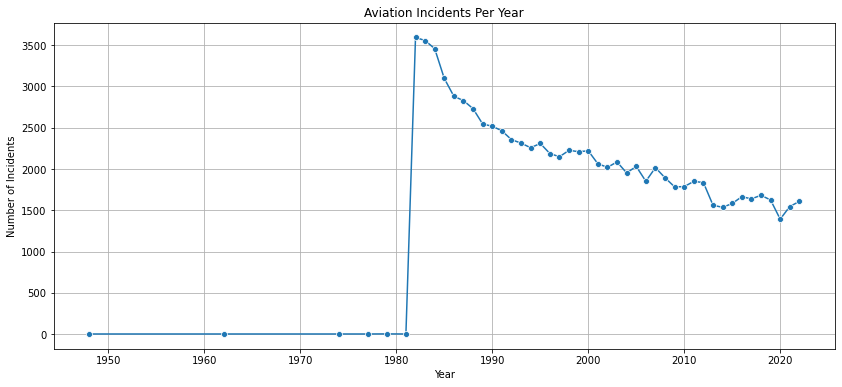

In [47]:
### 5.3 Accidents Over Time
yearly_incidents = aviation_data['Event_Year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.lineplot(x=yearly_incidents.index, y=yearly_incidents.values, marker='o')
plt.title('Aviation Incidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


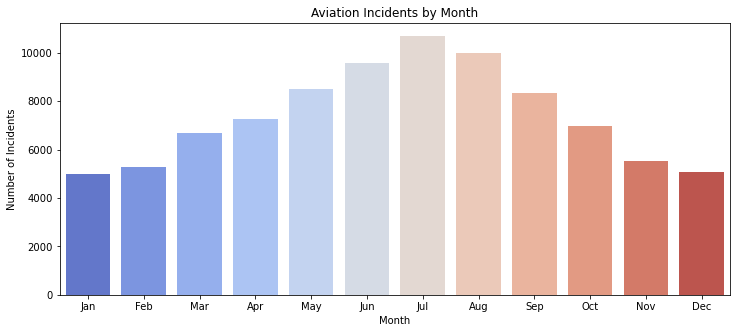

In [49]:
# 2. Incidents by Month (across all years)
# (are there more crashes in summer? bad weather months?)

monthly_incidents = aviation_data['Event_Month'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.barplot(x=monthly_incidents.index, y=monthly_incidents.values, palette="coolwarm")
plt.title('Aviation Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0,12), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

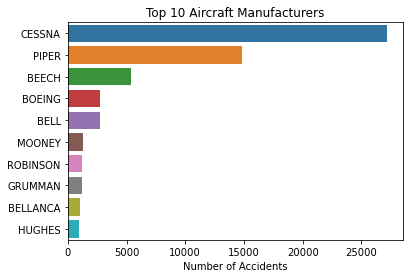

In [51]:
## 5. Exploratory Data Analysis (EDA)

### 5.1 Most Common Aircraft Manufacturers
top_makes = aviation_data['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Aircraft Manufacturers')
plt.xlabel('Number of Accidents')
plt.show()

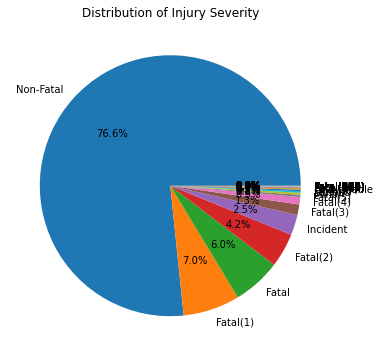

In [53]:
### 5.2 Severity of Accidents
injury_counts = aviation_data['Injury.Severity'].value_counts()
injury_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribution of Injury Severity')
plt.ylabel('')
plt.show()

In [55]:
# Check result
aviation_data[['Event.Date', 'Event_Year']].head()

,Event.Date,Event_Year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979


In [57]:
# Incident counts by year
yearly_incidents = aviation_data['Event_Year'].value_counts().sort_index()
yearly_incidents

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Event_Year, dtype: int64

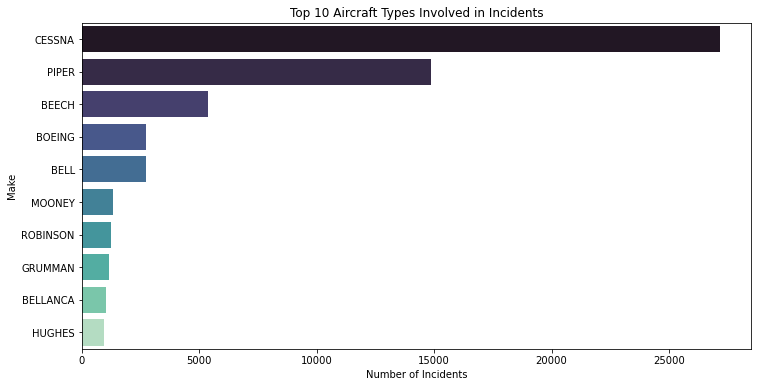

In [60]:

    top_aircraft = aviation_data['Make'].value_counts().head(10)

    plt.figure(figsize=(12,6))
    sns.barplot(x=top_aircraft.values, y=top_aircraft.index, palette="mako")
    plt.title('Top 10 Aircraft Types Involved in Incidents')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Make')
    plt.show()


## 6. Results and Insights
- Manufacturers like Hughes,Bellanca,Grumman,Robinson and Mooney have the lowest serious incidents.
- Certain Months show spikes in accidents — (During the summer months) Due to increased travel frequency
- Most accidents are minor, but fatal ones are concentrated in certain models.

---

## 7. Business Recommendations
1. **Prefer Aircraft from Hughes,Bellanca,Grumman,Robinson and Mooney**: Based on lower accident rates and severity.
2. **Avoid Cessna,Piper and Beech**: Due to higher fatality rates.
3. **Focus on Newer Models (Post-2000)**: Accident rates are lower after 2000.

---

## 8. Conclusion
- Data-driven insights suggest [Aircraft Types] are best to minimize risk.
- Next Steps:
  - Analyze maintenance records.
  - Further investigate accident causes (weather, pilot error, etc.)

---
